<h2><center> A Bayesian analysis of the potential emergence of life in Europa’s subsurface ocean and other ice exoplanets

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import random
import scipy.stats
from matplotlib.pyplot import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable

### Part 1: Determining the probability of a successful abiogenesis event given 3 parameters

In [26]:
# Define a dew common variables
max_lambda = 2**(1/3)
earth_water = 1.37 #(10**18)
earth_biogen = 1.288 #(10**23)
earth_energy = 64 #(mW m^{−2})

##### Liquid Water

In [27]:
#calculate slopes for water
lin_water = max_lambda/earth_water
exp_water = max_lambda/(earth_water**2)

first_water = np.linspace(0, earth_water, 1000)
second_water = np.linspace(earth_water, 2*earth_water, 1000)

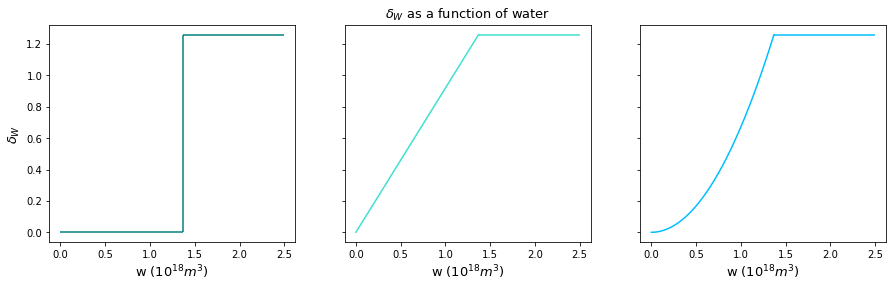

In [28]:
# Plot the 3 models of water
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize = (15, 4))

# Step function
ax1.hlines(y = 0, xmin = 0, xmax = earth_water, color = 'teal')
ax1.hlines(y = max_lambda, xmin = earth_water, xmax = 2.5, color = 'teal')
ax1.vlines(x = earth_water, ymin = 0, ymax = max_lambda, color = 'teal')
ax1.set_xlabel('w ($10^{18} m^{3}$)', fontsize = 13)
ax1.set_ylabel('$\delta_{W}$', fontsize=13)

# Linear
ax2.plot(first_water, lin_water*first_water, color = 'turquoise')
ax2.hlines(y = max_lambda, xmin = earth_water, xmax = 2.5, color = 'turquoise')
ax2.set_xlabel('w ($10^{18} m^{3}$)', fontsize = 13)
ax2.set_title('$\delta_{W}$ as a function of water', fontsize=13)

# Exponential
ax3.plot(first_water, exp_water*(first_water**2), color = 'deepskyblue')
ax3.hlines(y = max_lambda, xmin = earth_water, xmax = 2.5, color = 'deepskyblue')
ax3.set_xlabel('w ($10^{18} m^{3}$)', fontsize = 13)

plt.savefig('lam_water')

##### Biogenic Elements

In [29]:
#calculate slopes for biogenic elements
lin_biogen = max_lambda/earth_biogen
exp_biogen = max_lambda/(earth_biogen**2)

first_biogen = np.linspace(0, earth_biogen, 1000)
second_biogen = np.linspace(earth_biogen, 2*earth_biogen, 1000)

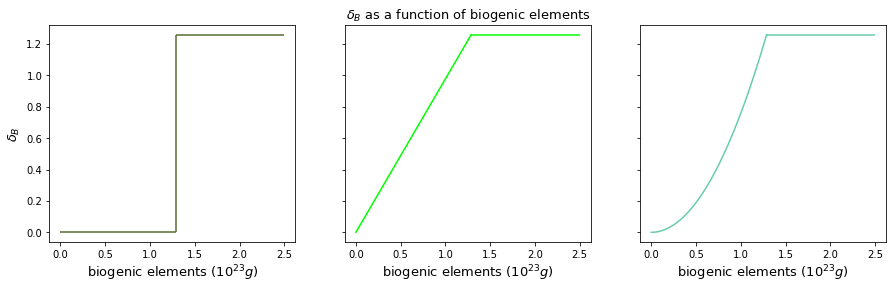

In [30]:
# Plot the 3 models for biogenic elements
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize = (15, 4))

# Step function
ax1.hlines(y = 0, xmin = 0, xmax = earth_biogen, color = 'darkolivegreen')
ax1.hlines(y = max_lambda, xmin = earth_biogen, xmax = 2.5, color = 'darkolivegreen')
ax1.vlines(x = earth_biogen, ymin = 0, ymax = max_lambda, color = 'darkolivegreen')
ax1.set_xlabel('biogenic elements ($10^{23} g$)', fontsize=13)
ax1.set_ylabel('$\delta_{B}$', fontsize=13)

# Linear
ax2.plot(first_biogen, lin_biogen*first_biogen, color = 'lime')
ax2.hlines(y = max_lambda, xmin = earth_biogen, xmax = 2.5, color = 'lime')
ax2.set_xlabel('biogenic elements ($10^{23} g$)', fontsize=13)
ax2.set_title('$\delta_{B}$ as a function of biogenic elements', fontsize=13)

# Exponential
ax3.plot(first_biogen, exp_biogen*(first_biogen**2), color = 'mediumaquamarine')
ax3.hlines(y = max_lambda, xmin = earth_biogen, xmax = 2.5, color = 'mediumaquamarine')
ax3.set_xlabel('biogenic elements ($10^{23} g$)', fontsize=13)

plt.savefig('lam_biogen')

##### Free Energy

In [31]:
#calculate slopes for free energy
lin_energy = max_lambda/earth_energy
exp_energy = max_lambda/(earth_energy**2)

first_energy = np.linspace(0, earth_energy, 1000)
second_energy = np.linspace(earth_energy, 2*earth_energy, 1000)

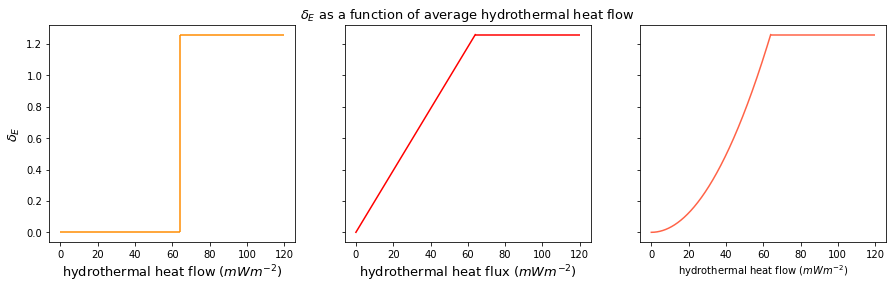

In [32]:
# Plot the 3 models for global hydrothermal heat flux
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize = (15, 4))

ax1.hlines(y = 0, xmin = 0, xmax = earth_energy, color = 'darkorange')
ax1.hlines(y = max_lambda, xmin = earth_energy, xmax = 120, color = 'darkorange')
ax1.vlines(x = earth_energy, ymin = 0, ymax = max_lambda, color = 'darkorange')
ax1.set_xlabel('hydrothermal heat flow ($mW m^{−2}$)', fontsize=13)
ax1.set_ylabel('$\delta_{E}$', fontsize=13)

ax2.plot(first_energy, lin_energy*first_energy, color = 'red')
ax2.hlines(y = max_lambda, xmin = earth_energy, xmax = 120, color = 'red')
ax2.set_xlabel('hydrothermal heat flux ($mW m^{−2}$)', fontsize=13)
ax2.set_title('$\delta_{E}$ as a function of average hydrothermal heat flow', fontsize=13)

ax3.plot(first_energy, exp_energy*(first_energy**2), color = 'tomato')
ax3.hlines(y = max_lambda, xmin = earth_energy, xmax = 120, color = 'tomato')
ax3.set_xlabel('hydrothermal heat flow ($mW m^{−2}$)')

plt.savefig('lam_hydro')

##### Rate Parameter

In [33]:
# Define function to calculate step function parameter
def step_fn(cutoff, measurement):
    if measurement >= cutoff:
        return max_lambda
    elif measurement < cutoff:
        return 0

# Define function to calculate linear function parameter
def linear_fn(cutoff, measurement,slope):
    if measurement >= cutoff:
        return max_lambda
    elif measurement < cutoff:
        return slope*measurement

# Define function to calculate quadratic parameter
def exp_fn(cutoff, measurement,slope):
    if measurement >= cutoff:
        return max_lambda
    elif measurement < cutoff:
        return slope*(measurement**2)


# Calculate the rate paramater based on the 3 parameters, and the models chosen for each parameter
def total_lambda(water_type, biogen_type, energy_type, water_measurement, biogen_measurement, energy_measurement, lin_slope_w, exp_slope_w, lin_slope_b, exp_slope_b, lin_slope_e, exp_slope_e):
    '''
    (str, str, str, float, float, float) -> float
    '''
    lam_list = [[water_measurement, water_type, earth_water, lin_slope_w, exp_slope_w], [biogen_measurement, biogen_type, earth_biogen, lin_slope_b, exp_slope_b], [energy_measurement, energy_type, earth_energy, lin_slope_e, exp_slope_e]]
    
    for i in range(len(lam_list)):
        
        if lam_list[i][1] == 'step':
            lam_list[i][0] = step_fn(lam_list[i][2], lam_list[i][0])
        elif lam_list[i][1] == 'lin':
            lam_list[i][0] = linear_fn(lam_list[i][2], lam_list[i][0], lam_list[i][3])
        else:
            lam_list[i][0] = exp_fn(lam_list[i][2], lam_list[i][0], lam_list[i][4])
            
    return lam_list[0][0] * lam_list[1][0] * lam_list[2][0]  

In [34]:
time = np.linspace(0, 10, 1000)

# Define function that plots a function in the form 1-exp(-x)
def plot_prob(lam, num):
    print('The rate parameter is', lam)
    model = 1 - np.exp(-lam*time)
    plt.plot(time, model)
    plt.title('Case' + str(num) + '')
    plt.xlabel('Time (Gyr)')
    plt.ylabel('Probability of Success')
    plt.show()

The rate parameter is 2.0


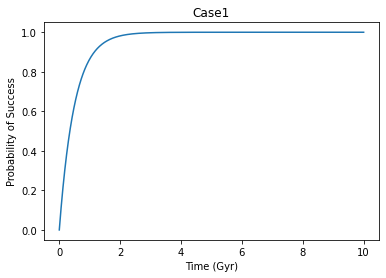

<Figure size 432x288 with 0 Axes>

In [35]:
# CASE 1: All conditions meet that of Earth
# Water model = exp
# Biogen model = exp
# Hydrotherm model = lin


lam = total_lambda('exp', 'exp', 'lin', 2, 2, 65, lin_water, exp_water, lin_biogen, exp_biogen, lin_energy, exp_energy)
plot_prob(lam, 1)

plt.savefig('lam_case1')

The rate parameter is 1.6093750000000002


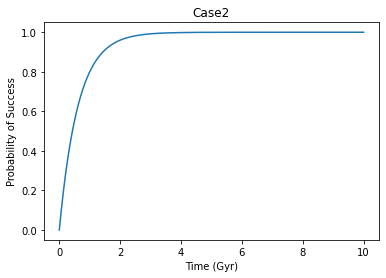

<Figure size 432x288 with 0 Axes>

In [36]:
# CASE 2: Water and Biogen conditions meet that of Earth, but hydrothermal flux is less than Earth.
# Water model = step
# Biogen model = exp
# Hydrotherm model = lin

lam = total_lambda('step', 'exp', 'lin', 2, 2, 51.5, lin_water, exp_water, lin_biogen, exp_biogen, lin_energy, exp_energy)
plot_prob(lam, 2)

plt.savefig('lam_case2')

The rate parameter is 0.36610401459854014


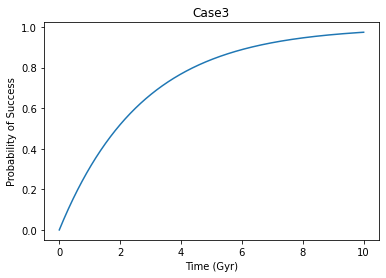

<Figure size 432x288 with 0 Axes>

In [37]:
# CASE 3: Biogen meet that of Earth, but water and hydrotherm is less than Earth.
# Water model = lin
# Biogen model = exp
# Hydrotherm model = lin

lam = total_lambda('lin', 'step', 'lin', 1, 2, 16.05, lin_water, exp_water, lin_biogen, exp_biogen, lin_energy, exp_energy)
plot_prob(lam, 3)

plt.savefig('lam_case3')

The rate parameter is 0.0


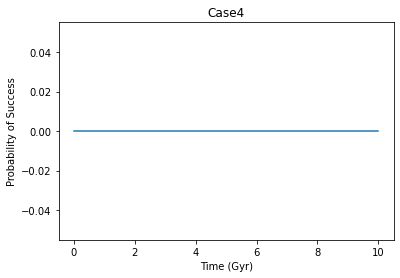

<Figure size 432x288 with 0 Axes>

In [38]:
# CASE 4: Biogen and Hydrothermal conditions meet that of Earth, but water is less than Earth.
# Water model = step
# Biogen model = exp
# Hydrotherm model = lin

lam = total_lambda('step', 'exp', 'lin', 1, 2, 65, lin_water, exp_water, lin_biogen, exp_biogen, lin_energy, exp_energy)
plot_prob(lam, 4)

plt.savefig('lam_case4')

#### Europa

The rate parameter is 0.7187500000000001


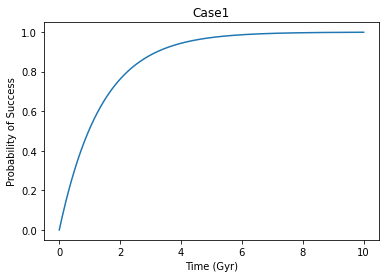

<Figure size 432x288 with 0 Axes>

In [39]:
lam = total_lambda('lin', 'lin', 'lin', 3, 5, 23, lin_water, exp_water, lin_biogen, exp_biogen, lin_energy, exp_energy)
plot_prob(lam, 1)

plt.savefig('lam_europa')

The rate parameter is 0.25830078125000006


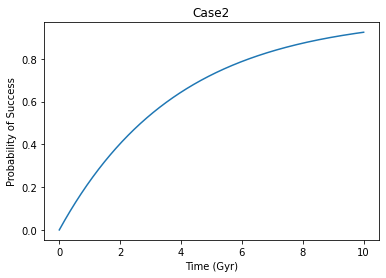

<Figure size 432x288 with 0 Axes>

In [40]:
lam = total_lambda('lin', 'lin', 'exp', 3, 5, 23, lin_water, exp_water, lin_biogen, exp_biogen, lin_energy, exp_energy)
plot_prob(lam, 2)

plt.savefig('lam_europa')

The rate parameter is 0.0


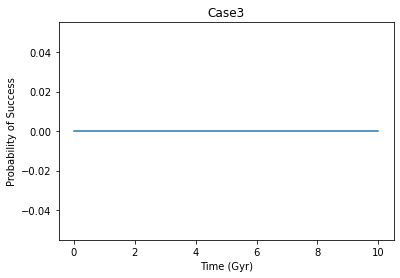

<Figure size 432x288 with 0 Axes>

In [41]:
lam = total_lambda('lin', 'lin', 'step', 3, 5, 23, lin_water, exp_water, lin_biogen, exp_biogen, lin_energy, exp_energy)
plot_prob(lam, 3)

plt.savefig('lam_europa')

### Part 2: Bayesian analysis of λ parameter given detection of life

#### Given a single observation of a planet, and discovering life 5 billion years after its formation

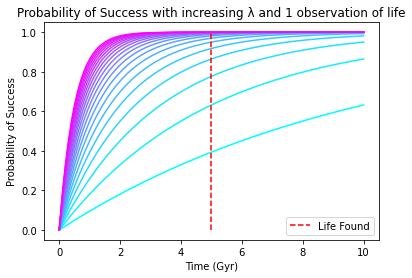

<Figure size 432x288 with 0 Axes>

In [42]:
time_array= np.linspace(0,10,100)
lam_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2]

# Function to plot probability of life as a function of time
def life_plot(time, lam):
    exp_element = 1-np.exp(-1*lam*time)
    return exp_element


# Show plot for different lambdas in lam_list
color=iter(cm.cool(np.linspace(0,1,len(lam_list))))
for i in range(len(lam_list)):
    c=next(color)
    plt.plot(time_array, life_plot(time_array, lam_list[i]), color= c)
    
plt.title('Probability of Success with increasing λ and 1 observation of life')
plt.vlines(5, 0, 1, 'red', linestyles = 'dashed', zorder = 10, label = 'Life Found')
plt.xlabel('Time (Gyr)')
plt.ylabel('Probability of Success')
plt.legend()

plt.show()

plt.savefig('Part2_1obs')

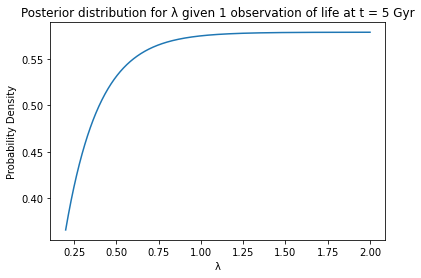

<Figure size 432x288 with 0 Axes>

In [43]:
# If life observed at t=5 billion years, and max lam=2 (discussed above), 
#then we expect the range of lam to be [0.2,2] (this is our prior knowledge)

lam_array = np.linspace(0.2,2,1000)

# Define function to plot the probability of life as a function of lambda
def posterior(life, lam):
    likelihood_prob = 1 - np.exp(-(lam*life))
    dx = (lam[1]-lam[0])
    like_norm = likelihood_prob/np.sum(likelihood_prob*dx)
    return like_norm
    
plt.plot(lam_array, posterior(5, lam_array))
plt.title('Posterior distribution for λ given 1 observation of life at t = 5 Gyr')
plt.xlabel('λ')
plt.ylabel('Probability Density')
plt.show()

plt.savefig('Part2_1obs_post')

Discuss the range, and that we don't know whether the rate is 0.2, but could also be bigger.

#### Given multiple observation of a planet over time (t=1,2,3,4) and finding no life, and then finding life at 5 billions years

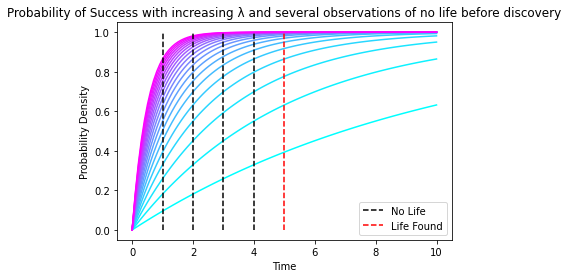

<Figure size 432x288 with 0 Axes>

In [44]:
time_array= np.linspace(0,10,100)
lam_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2]

# Plot probability of life as a function of time and show observations of life or no life
def life_plot(time, lam):
    exp_element = 1-np.exp(-1*lam*time)
    return exp_element

# Show plots of probability for different lambdas
color=iter(cm.cool(np.linspace(0,1,len(lam_list))))
for i in range(len(lam_list)):
    c=next(color)
    plt.plot(time_array, life_plot(time_array, lam_list[i]), color= c)

plt.title('Probability of Success with increasing λ and several observations of no life before discovery')
plt.vlines(1, 0, 1, 'black', linestyles = 'dashed', zorder = 10)
plt.vlines(2, 0, 1, 'black', linestyles = 'dashed', zorder = 10)
plt.vlines(3, 0, 1, 'black', linestyles = 'dashed', zorder = 10)
plt.vlines(4, 0, 1, 'black', linestyles = 'dashed', zorder = 10, label = 'No Life')
plt.vlines(5, 0, 1, 'red', linestyles = 'dashed', zorder = 10, label = 'Life Found')
plt.xlabel('Time')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

plt.savefig('Part2_more_obs')

### Uniform Prior

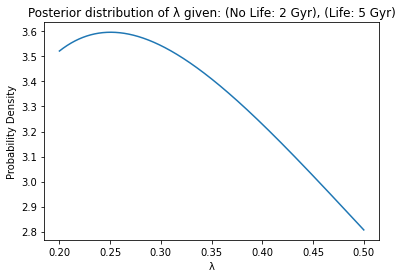

The abiogenesis rate is likely to be 0.2505550555055506  and or therefore a successful event should occur once every 3.9911387857741585  billion years


In [45]:
#p(lam|life@5,nolife@2) = p(life@5|lam)p(nolife@2|lam)p(lam)
#given that we updated our prior knowledge, we have a uniform prior in range of [0.2,0.5]
#if plife+pnolife=1, pnolife=exp(-lam*t)

lam_array = np.linspace(0.2,0.5,10000)

# Determine probability of life as a function of lambda
def life(life, lam):
    likelihood_prob = 1 - np.exp(-(lam*life))
    dx = (lam[1]-lam[0])
    like_norm = likelihood_prob/np.sum(likelihood_prob*dx)
    return likelihood_prob

# Determine probability of no life as a function of lambda
def no_life(no_life, lam):
    likelihood_prob = np.exp(-(lam*no_life))
    dx = (lam[1]-lam[0])
    like_norm = likelihood_prob/np.sum(likelihood_prob*dx)
    return likelihood_prob

# Multiply the probabilities of no life and life
def posterior_2(life_list, no_life_list, lam):
    life_start = 1
    no_life_start = 1
    dx = lam[1]-lam[0]
    for i in life_list:
        life_start = life_start*life(i, lam) 
    for i in no_life_list:
        no_life_start = no_life_start*no_life(i, lam)    
    post = life_start*no_life_start
    norm_post = post/np.sum(post*dx)
    return norm_post
    
life_list = [5]
no_life_list = [2]

# Plot the joint probability
plt.plot(lam_array, posterior_2(life_list, no_life_list, lam_array))
plt.title('Posterior distribution of λ given: (No Life: 2 Gyr), (Life: 5 Gyr)')
plt.xlabel('λ')
plt.ylabel('Probability Density')
plt.show()

# Find the peak of a curve
def find_peak(post):
    max_prob = np.max(post)
    lam = 0
    for i in range(len(lam_array)):
        if post[i] == max_prob:
            lam = lam_array[i]
    return lam

lam = find_peak(posterior_2(life_list, no_life_list, lam_array))
        
print('The abiogenesis rate is likely to be', lam, ' and or therefore a successful event should occur once every', str(1/lam), ' billion years')

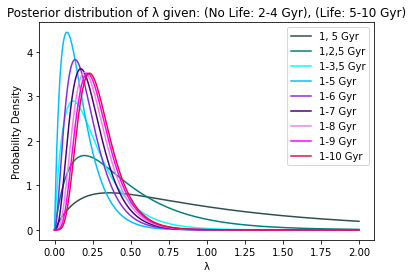

The abiogenesis rate is likely to be 0.23002300230023004  and or therefore a successful event should occur once every 4.347391304347826  billion years


In [46]:
# Look at different probability distributions with different observations

# Ignore prior for the purpose of showing the whole plot unclipped
lam_array = np.linspace(0,2,10000)

#Define lists that simulate different possible combinations of observations

life_list = [5]
no_life_list = [1]

life_list2 = [5]
no_life_list2 = [1, 2]

life_list3 = [5]
no_life_list3 = [1, 2, 3]

life_list4 = [5]
no_life_list4 = [1, 2, 3, 4]

life_list5 = [5, 6]
no_life_list5 = [1, 2, 3, 4]

life_list6 = [5, 6, 7]
no_life_list6 = [1, 2, 3, 4]

life_list7 = [5, 6, 7, 8]
no_life_list7 = [1, 2, 3, 4]

life_list8 = [5, 6, 7, 8, 9]
no_life_list8 = [1, 2, 3, 4]

life_list9 = [5, 6, 7, 8, 9, 10]
no_life_list9 = [1, 2, 3, 4]

# Plot all of the combinations
plt.plot(lam_array, posterior_2(life_list, no_life_list, lam_array), color = 'darkslategrey', label = '1, 5 Gyr')
plt.plot(lam_array, posterior_2(life_list2, no_life_list2, lam_array), color = 'teal', label = '1,2,5 Gyr')
plt.plot(lam_array, posterior_2(life_list3, no_life_list3, lam_array), color = 'aqua', label = '1-3,5 Gyr')
plt.plot(lam_array, posterior_2(life_list4, no_life_list4, lam_array), color = 'deepskyblue', label = '1-5 Gyr')
plt.plot(lam_array, posterior_2(life_list5, no_life_list5, lam_array), color = 'blueviolet', label = '1-6 Gyr')
plt.plot(lam_array, posterior_2(life_list6, no_life_list6, lam_array), color = 'indigo', label = '1-7 Gyr')
plt.plot(lam_array, posterior_2(life_list7, no_life_list7, lam_array), color = 'violet', label = '1-8 Gyr')
plt.plot(lam_array, posterior_2(life_list8, no_life_list8, lam_array), color = 'magenta', label = '1-9 Gyr')
plt.plot(lam_array, posterior_2(life_list9, no_life_list9, lam_array), color = 'crimson', label = '1-10 Gyr')
plt.legend()
plt.title('Posterior distribution of λ given: (No Life: 2-4 Gyr), (Life: 5-10 Gyr)')
plt.xlabel('λ')
plt.ylabel('Probability Density')
plt.show()


lam = find_peak(posterior_2(life_list9, no_life_list9, lam_array))
        
print('The abiogenesis rate is likely to be', lam, ' and or therefore a successful event should occur once every', str(1/lam), ' billion years')

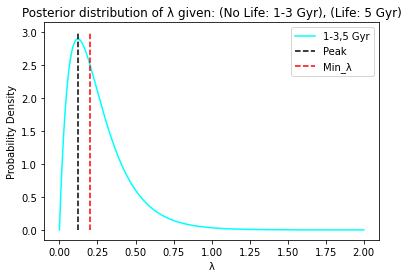

The abiogenesis rate is likely to be 0.12121212121212122  and or therefore a successful event should occur once every 8.25  billion years


In [47]:
# Plot to show that the peak might lie outside of the prior range

lam_array = np.linspace(0,2,10000)


life_list3 = [5]
no_life_list3 = [1, 2, 3]


plt.plot(lam_array, posterior_2(life_list3, no_life_list3, lam_array), color = 'aqua', label = '1-3,5 Gyr')
plt.vlines(0.121212, 0, 3, 'black', linestyles = 'dashed', zorder = 10, label = 'Peak')
plt.vlines(0.2, 0, 3, 'red', linestyles = 'dashed', zorder = 10, label = 'Min_λ')
plt.legend()
plt.title('Posterior distribution of λ given: (No Life: 1-3 Gyr), (Life: 5 Gyr)')
plt.xlabel('λ')
plt.ylabel('Probability Density')
plt.show()


lam = find_peak(posterior_2(life_list3, no_life_list3, lam_array))
        
print('The abiogenesis rate is likely to be', lam, ' and or therefore a successful event should occur once every', str(1/lam), ' billion years')

### Gaussian Prior

The abiogenesis rate is likely to be 0.2122122122122122 or a successful event should occur once every 4.712264150943397  billion years


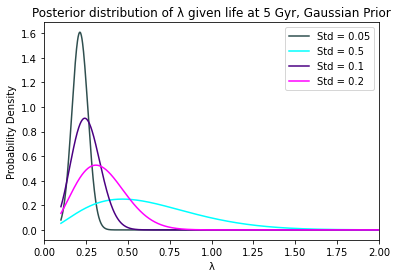

In [51]:
# Find the probability of life using a gaussian prior (essentially redoing the problem with a gaussian prior)

# Define a Gaussian prior
def prior(mean_est, std_est):
    prior_prob = scipy.stats.norm(mean_est, std_est)
    prior_norm = prior_prob.pdf(lam_array)/np.sum(prior_prob.pdf(lam_array)*0.01)
    return prior_norm

# define likelihood that calculates the probability of life as a function of lambda
def likelihood(lam, time):
    likelihood_prob = 1 - np.exp(-(lam*time))
    likelihood_prob *= likelihood_prob
    like_norm = likelihood_prob/np.sum(likelihood_prob*0.01)
    return like_norm

# Define a function that multiplies the prior and likelihood
def posterior(mean_est, std_est, lam, time):
    post = prior(mean_est, std_est) * likelihood(lam, time)
    post_norm = post/np.sum(post*0.01)
    return post_norm

# Define a function that plots the posterior
def graph_prob(mean_est, std_est, lam, time, c, l):
    plt.plot(lam, posterior(mean_est, std_est, lam, time), color = c, label = l)
    plt.title('Posterior distribution of λ given life at 5 Gyr, Gaussian Prior')
    plt.xlabel('λ')
    plt.ylabel('Probability Density')
    plt.xlim(0,2)
    plt.legend()
    
lam_array = np.linspace(0.1, 2, 1000)
time_of_life = 5
mean_est = 1/time_of_life
std_est1 = 0.05
std_est2 = 0.5
std_est3 = 0.1
std_est4 = 0.2

c = 'darkslategrey'
l = 'Std = 0.05'
graph_prob(mean_est, std_est1, lam_array, time_of_life, c, l)
c = 'aqua'
l = 'Std = 0.5'
graph_prob(mean_est, std_est2, lam_array, time_of_life, c, l)
c = 'indigo'
l = 'Std = 0.1'
graph_prob(mean_est, std_est3, lam_array, time_of_life, c, l)
c = 'magenta'
l = 'Std = 0.2'
graph_prob(mean_est, std_est4, lam_array, time_of_life, c, l)


lam = find_peak(posterior(mean_est, std_est1, lam_array, time_of_life))

print('The abiogenesis rate is likely to be', lam, 'or a successful event should occur once every', str(1/lam), ' billion years')